# Templates

## Random Forest Classifier

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression


In [32]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
#Carregar Arquivos de treinamento e teste
train = pd.read_csv("train.csv") #ARQUIVO TREINO
test = pd.read_csv("test.csv")   #ARQUIVO TESTE

In [34]:
#Ajustando features
#Aplica a função em todas as linhas (comando .map):
train['Sex_binario'] = train['Sex'].map({'female': 1, 'male': 0}) 
test['Sex_binario'] = test['Sex'].map({'female': 1, 'male': 0}) 

In [35]:
#Tratar NaN
#Neste caso, por simplificação substituir NaN por -1
train = train.fillna(-1)
test = test.fillna(-1)

In [36]:
#Criar variáveis e arquivo entrada e saída:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

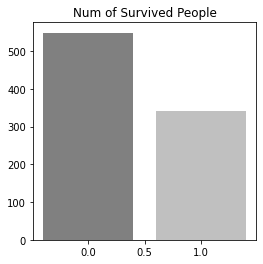

In [60]:
plt.figure(figsize=(4,4))
plt.bar(list(train['Survived'].value_counts().keys()), list(train['Survived'].value_counts()), color=('grey', 'silver'))
plt.title("Num of Survived People")
plt.show()

In [61]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [62]:
sum(train['Survived'].isnull())

0

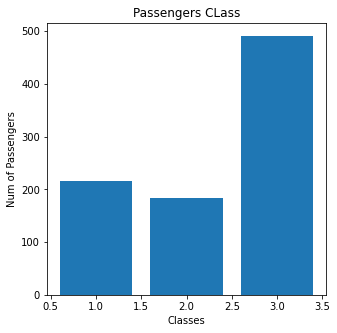

In [63]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Pclass'].value_counts().keys()), list(train['Pclass'].value_counts()))
plt.title("Passengers CLass")
plt.xlabel("Classes")
plt.ylabel("Num of Passengers")
plt.show()

In [65]:
train['Pclass'].value_counts() #Passengers Class

3    491
1    216
2    184
Name: Pclass, dtype: int64

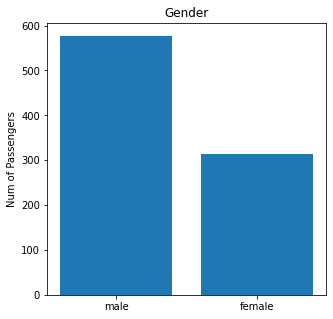

In [66]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Sex'].value_counts().keys()), list(train['Sex'].value_counts()))
plt.title("Gender")
plt.ylabel("Num of Passengers")
plt.show()

In [67]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

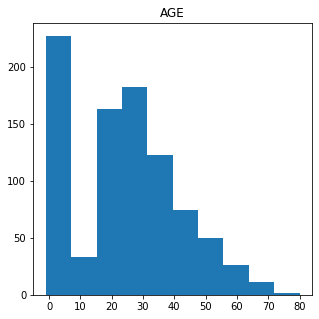

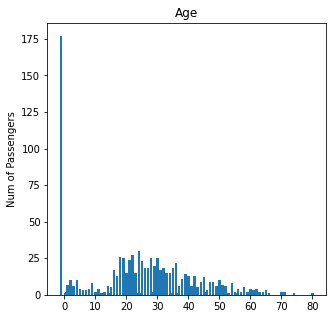

In [68]:
#Historgram
plt.figure(figsize=(5,5))
plt.hist(train['Age'])
plt.title("AGE")
plt.show()

#Bar
plt.figure(figsize=(5,5))
plt.bar(list(train['Age'].value_counts().keys()), list(train['Age'].value_counts()))
plt.title("Age")
plt.ylabel("Num of Passengers")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

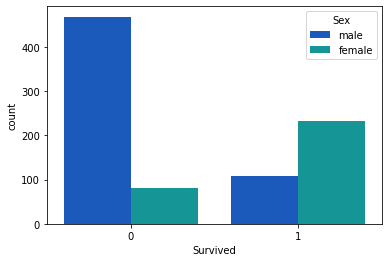

In [73]:
sns.countplot(x="Survived", hue='Sex', data=train, palette="winter")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

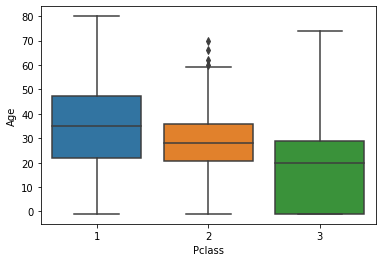

In [74]:
sns.boxplot(x="Pclass", y="Age", data=train)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

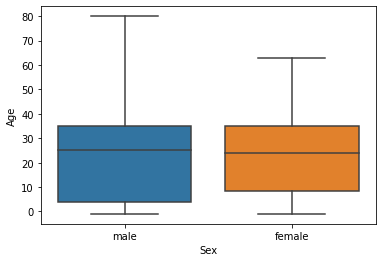

In [75]:
sns.boxplot(x="Sex", y="Age", data=train)

In [76]:
train.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin                 0
Embarked              0
Sex_binario           0
Embarked_S            0
Embarked_C            0
Cabine_nula           0
Nome_contem_Miss      0
Nome_contem_Mrs       0
Nome_contem_Master    0
Nome_contem_Col       0
Nome_contem_Major     0
Nome_contem_Mr        0
dtype: int64

### Separar Treino e Validação
### Split

In [37]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [38]:
X_valid.index.name = 'PassengerId'

In [39]:
#Modelo RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [40]:
#Testar modelo
p = modelo.predict(X_valid)
p

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [41]:
np.mean(y_valid == p)

0.7802690582959642

## Validações Cruzadas

In [42]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [43]:
np.mean(resultados)

0.8041457147175896

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

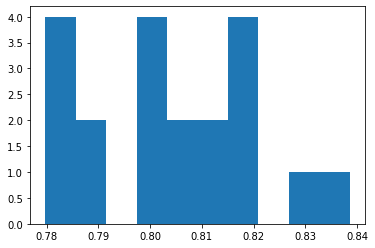

In [44]:
pylab.hist(resultados)

## Arquivo de saída - submissions

In [45]:
#Criando arquivo de submissão Kaggle
sub = pd.Series(p, index = X_valid.index, name='Survived')

In [46]:
sub.to_csv("terceiro_modelo.csv", header=True)

## Análise dos Erros

In [47]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S,0,0


In [48]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,-1,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,-1,S,1,0,1


In [49]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [50]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,-1,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,-1,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,-1,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,-1,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,-1,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,-1,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,-1,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,-1,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,-1,Q,1,1,0


In [51]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,-1,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,-1,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,-1,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,-1,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,-1,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,-1,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,-1.00,1,0,367229,7.7500,-1,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,-1,S,0,1,0


## Após análise, criar novas variáveis

In [52]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [53]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [54]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()
    
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.8295964125560538

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.7932584269662921

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8340807174887892

Treino: 446
Valid: 445


C:\VIRTUALENVS\DADOS\VENVDADOS\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\VIRTUALENVS\DADOS\VENVDADOS\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8295964125560538

Treino: 446
Valid: 445
Acc: 0.8134831460674158

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8071748878923767

Treino: 446
Valid: 445
Acc: 0.7955056179775281

Treino: 445
Valid: 446
Acc: 0.8363228699551569

Treino: 446
Valid: 445
Acc: 0.8134831460674158

Treino: 445
Valid: 446
Acc: 0.8251121076233184

Treino: 446
Valid: 445
Acc: 0.8179775280898877



C:\VIRTUALENVS\DADOS\VENVDADOS\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\VIRTUALENVS\DADOS\VENVDADOS\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

((array([2., 1., 3., 1., 3., 4., 0., 1., 2., 3.]),
  array([0.79325843, 0.79778909, 0.80231975, 0.80685041, 0.81138107,
         0.81591172, 0.82044238, 0.82497304, 0.8295037 , 0.83403436,
         0.83856502]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

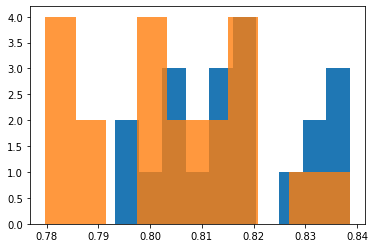

In [55]:
pylab.hist(resultados2), pylab.hist(resultados,alpha=0.8)

In [56]:
np.mean(resultados2)

0.8159270922557565

In [57]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

modelo = LogisticRegression()
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

C:\VIRTUALENVS\DADOS\VENVDADOS\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')

## Arquivo de saída - submissions

In [59]:
sub.to_csv("Quarto_modelo.csv", header=True)